In [38]:
from sklearn.linear_model import LinearRegression    # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures  # 다항특성 만들어주는 라이브러리
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 설정
matplotlib.rcParams['font.size'] = 10 #글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

alcohol sugar pH로 화이트, 레드 와인을 구분하는 모델 구현

In [39]:
wine = pd.read_csv('https://bit.ly/wine-date')
['alcohol', 'sugar', 'pH', 'class']
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [40]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


<Axes: >

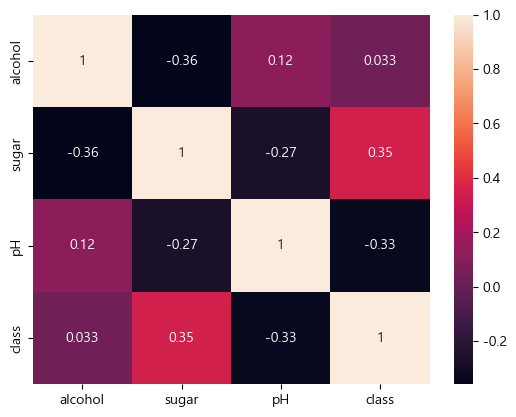

In [41]:
import seaborn as sns
corr = wine.corr(method='pearson')
show_cols = wine.columns
sns.heatmap(corr.values,
            annot = True,
            yticklabels=show_cols,
            xticklabels=show_cols
            )

In [42]:
# 로지스틱회귀로 모델 구현
input = wine.iloc[:,:-1].to_numpy()
target = wine['class'].to_numpy()

In [43]:
train_input, test_input, train_taret, test_target = train_test_split(
    input, target, random_state=42)

In [44]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input,train_taret)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [45]:
# 데이터 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_taret)
print(lr.score(train_scaled,train_taret))
print(lr.score(test_scaled,test_target))

0.7859195402298851
0.7655384615384615


In [46]:
# 경사하강법
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', random_state=42)
sc.fit(train_scaled,train_taret)
print(sc.score(train_scaled,train_taret))
print(sc.score(test_scaled,test_target))

0.7736042692939245
0.7513846153846154


In [47]:
train = []
test = []
classes = np.unique(train_taret)
for _ in range(1,300):
    sc.partial_fit(train_scaled, train_taret, classes=classes)
    train.append(sc.score(train_scaled,train_taret))
    test.append(sc.score(test_scaled,test_target))

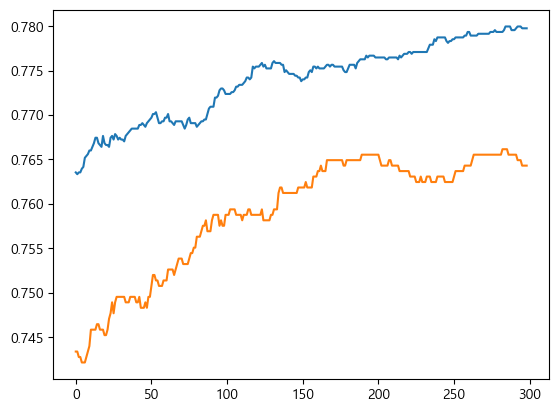

In [48]:
plt.plot(train)
plt.plot(test)

In [49]:
# 피쳐 적음, 정답률 낮음, 다른 모델 대입 후 사용.

In [50]:
# 결정 트리 모델
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_taret)
print(dt.score(train_scaled,train_taret))
print(dt.score(test_scaled,test_target))

# 과대 적합 - 85%로 높은 정답률 가짐.

0.9973316912972086
0.8516923076923076


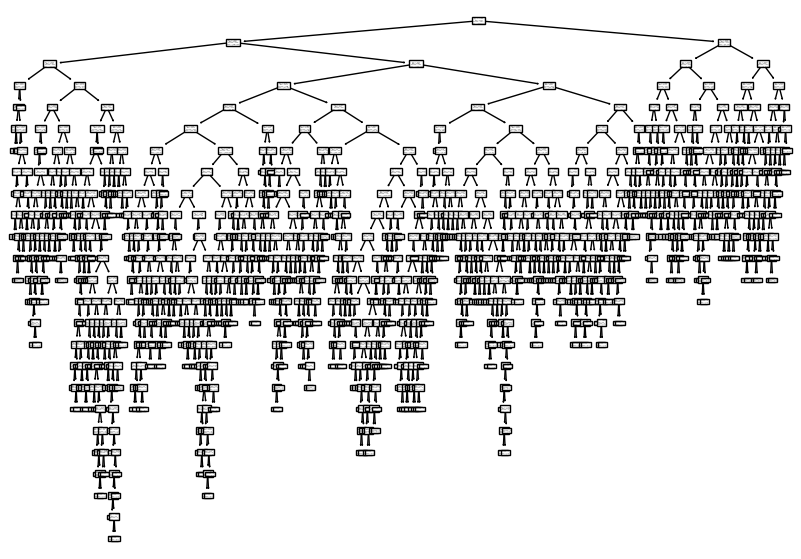

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

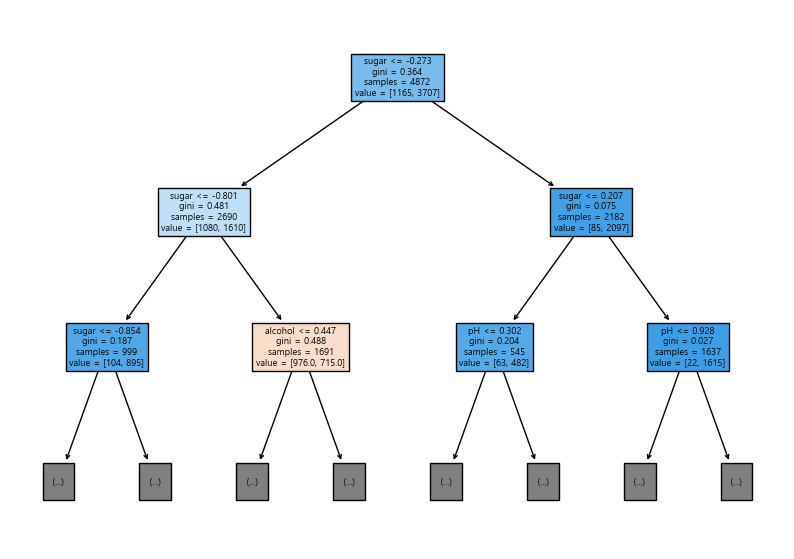

In [52]:
plt.figure(figsize=(10,7))
# max_depth: 가지의 깊이 조정
# filled: 색상 조정 (파란색 - 양성클래스 (1)/ 주황색 - 음성 클래스 (0))
# gini - 불순도 (1-(음성클래스 비율))aco= 
plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

# 순수노드 나올때까지 훈련
# 과대적합

In [53]:
# 가지치기로 과대 적합 문제 해결
# 3~10 가장 효율이 좋은 모델 적용
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled,train_taret)
print(dt.score(train_scaled,train_taret))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


[Text(0.5, 0.875, 'sugar <= -0.273\ngini = 0.364\nsamples = 4872\nvalue = [1165, 3707]'),
 Text(0.25, 0.625, 'sugar <= -0.801\ngini = 0.481\nsamples = 2690\nvalue = [1080, 1610]'),
 Text(0.125, 0.375, 'sugar <= -0.854\ngini = 0.187\nsamples = 999\nvalue = [104, 895]'),
 Text(0.0625, 0.125, 'gini = 0.034\nsamples = 523\nvalue = [9, 514]'),
 Text(0.1875, 0.125, 'gini = 0.319\nsamples = 476\nvalue = [95, 381]'),
 Text(0.375, 0.375, 'alcohol <= 0.447\ngini = 0.488\nsamples = 1691\nvalue = [976.0, 715.0]'),
 Text(0.3125, 0.125, 'gini = 0.414\nsamples = 1048\nvalue = [741, 307]'),
 Text(0.4375, 0.125, 'gini = 0.464\nsamples = 643\nvalue = [235, 408]'),
 Text(0.75, 0.625, 'sugar <= 0.207\ngini = 0.075\nsamples = 2182\nvalue = [85, 2097]'),
 Text(0.625, 0.375, 'pH <= 0.302\ngini = 0.204\nsamples = 545\nvalue = [63, 482]'),
 Text(0.5625, 0.125, 'gini = 0.114\nsamples = 347\nvalue = [21, 326]'),
 Text(0.6875, 0.125, 'gini = 0.334\nsamples = 198\nvalue = [42, 156]'),
 Text(0.875, 0.375, 'pH <= 0.

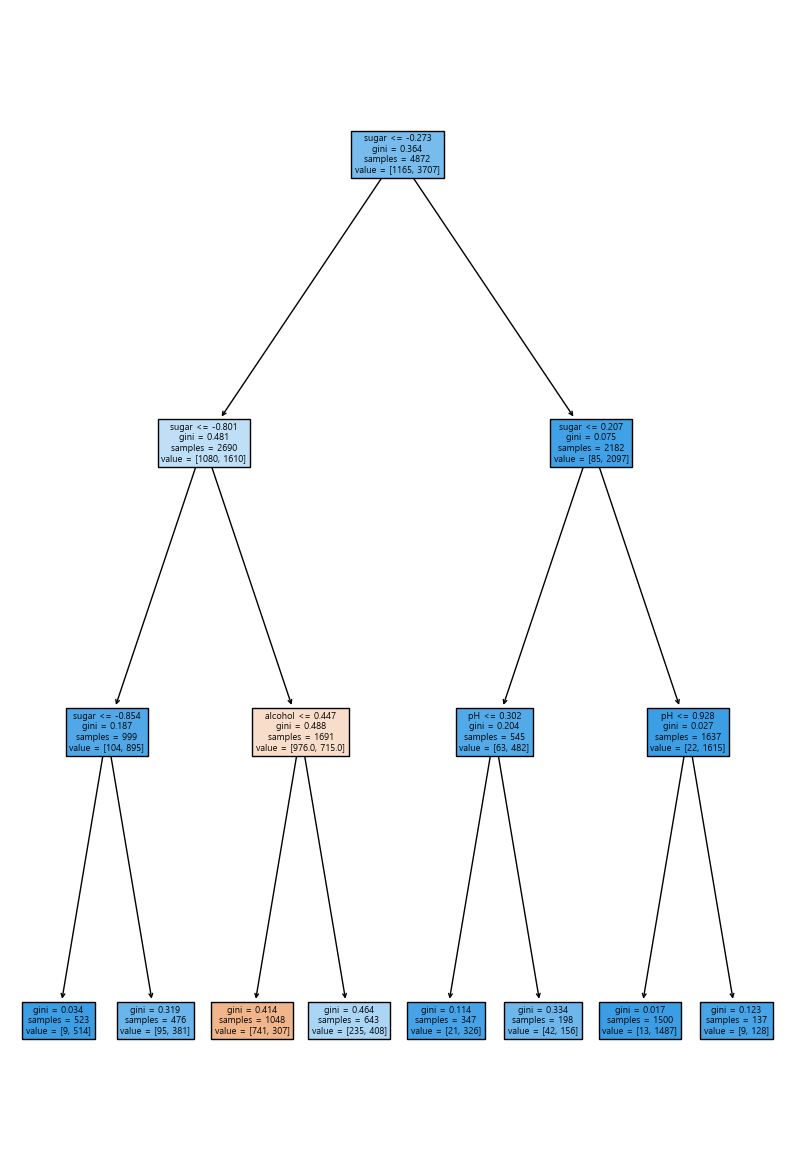

In [55]:
plt.figure(figsize=(10,15))
plot_tree(dt,filled=True,feature_names=wine.columns)

In [57]:
# 가지치기로 과대 적합 문제 해결
# 3~10 가장 효율이 좋은 모델 적용
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled,train_taret)
print(dt.score(train_scaled,train_taret))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


In [59]:
# min_impurity_decrease 최소 불순도 조정 --> 속도, 효율 개선
# 부모 불순도 - 자식 불순도, 크기 큰 쪽 선택 --> 차이가 0.005 이하인 경우 그 노드에서 결정. (순수 노드까지 안 내려감)
# 과대 적합 해결방법 - 1). max_depth, 2). min_impurity_decrease
dt = DecisionTreeClassifier(min_impurity_decrease=0.005, random_state=42)
dt.fit(train_scaled,train_taret)
print(dt.score(train_scaled,train_taret))
print(dt.score(test_scaled,test_target))

0.8626847290640394
0.8492307692307692
